In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
import scipy
from scipy.stats import pearsonr

In [2]:
producer_mixed_df=pd.read_csv('/workspaces/Power-Consumption-Pattern/DK1_mixed.csv')
producer_mixed_df2=pd.read_csv('/workspaces/Power-Consumption-Pattern/DK2_mixed.csv')
mixed_df=pd.read_csv('/workspaces/Power-Consumption-Pattern/NO/All CSV/NO_mixed.csv')
df_2018=pd.read_csv('/workspaces/Power-Consumption-Pattern/NO/All CSV/NO_2018.csv')
mixed_df

,Unnamed: 0,date,month,hour,values_2023,values_2022,values_2021,values_2020,values_2019,values_2018
0,0,1.0,1.0,0.0,4.43,4.06,3.68,3.31,2.94,2.57
1,1,1.0,1.0,1.0,4.22,3.40,2.58,1.76,0.94,0.11
2,2,1.0,1.0,2.0,4.08,3.92,3.75,3.58,3.41,3.24
3,3,1.0,1.0,3.0,6.18,4.07,1.95,-0.16,-2.27,-4.38
4,4,1.0,1.0,4.0,4.30,3.78,3.26,2.74,2.22,1.71
...,...,...,...,...,...,...,...,...,...,...
8755,8755,31.0,12.0,19.0,12.47,10.18,7.89,5.59,3.30,1.00
8756,8756,31.0,12.0,20.0,7.05,4.48,1.91,-0.66,-3.23,-5.80
8757,8757,31.0,12.0,21.0,5.69,4.36,3.02,1.68,0.34,-1.00
8758,8758,31.0,12.0,22.0,6.82,4.38,1.95,-0.49,-2.93,-5.37


In [3]:
producer_mixed_df2

,Unnamed: 0,date,month,hour,2018_values,2019_values,2020_values,2021_values,2022_values,2023_values
0,0,1,1,0,1566.12,1348.33,1337.38,1363.04,1339.80,1266.10
1,1,1,1,1,1460.45,1291.21,1293.37,1309.83,1283.86,1214.75
2,2,1,1,2,1423.79,1239.81,1241.41,1260.21,1243.84,1166.02
3,3,1,1,3,1380.47,1223.86,1197.14,1231.28,1229.96,1121.30
4,4,1,1,4,1297.33,1224.25,1183.64,1234.17,1200.01,1098.68
...,...,...,...,...,...,...,...,...,...,...
8755,8755,31,12,19,0.00,0.00,0.00,0.00,0.00,0.00
8756,8756,31,12,20,0.00,0.00,0.00,0.00,0.00,0.00
8757,8757,31,12,21,0.00,0.00,0.00,0.00,0.00,0.00
8758,8758,31,12,22,0.00,0.00,0.00,0.00,0.00,0.00


In [4]:
mixed_df

,Unnamed: 0,date,month,hour,values_2023,values_2022,values_2021,values_2020,values_2019,values_2018
0,0,1.0,1.0,0.0,4.43,4.06,3.68,3.31,2.94,2.57
1,1,1.0,1.0,1.0,4.22,3.40,2.58,1.76,0.94,0.11
2,2,1.0,1.0,2.0,4.08,3.92,3.75,3.58,3.41,3.24
3,3,1.0,1.0,3.0,6.18,4.07,1.95,-0.16,-2.27,-4.38
4,4,1.0,1.0,4.0,4.30,3.78,3.26,2.74,2.22,1.71
...,...,...,...,...,...,...,...,...,...,...
8755,8755,31.0,12.0,19.0,12.47,10.18,7.89,5.59,3.30,1.00
8756,8756,31.0,12.0,20.0,7.05,4.48,1.91,-0.66,-3.23,-5.80
8757,8757,31.0,12.0,21.0,5.69,4.36,3.02,1.68,0.34,-1.00
8758,8758,31.0,12.0,22.0,6.82,4.38,1.95,-0.49,-2.93,-5.37


In [5]:
from scipy.stats import pearsonr
covariance_df = pd.DataFrame()
covariance_df['date'] = df_2018['date']
covariance_df['month'] = df_2018['month']
covariance_df['hour'] =df_2018['hour']
for i in range(0, 8760):
    row1 = mixed_df.iloc[i].drop(['month', 'date', 'hour','Unnamed: 0']).astype(float)
    row2 = producer_mixed_df.iloc[i].drop(['month', 'date', 'hour','Unnamed: 0']).astype(float)
    row3 = producer_mixed_df2.iloc[i].drop(['month', 'date', 'hour','Unnamed: 0']).astype(float)
    covariance_df.loc[i, 'covariance_value_with_DK1'] = pearsonr(row1, row2)[0]
    covariance_df.loc[i, 'covariance_value_with_DK2'] = pearsonr(row1, row3)[0]
covariance_df.reset_index(drop=True, inplace=True)
covariance_df

/tmp/ipykernel_10848/1864875195.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  covariance_df.loc[i, 'covariance_value_with_DK1'] = pearsonr(row1, row2)[0]
/tmp/ipykernel_10848/1864875195.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  covariance_df.loc[i, 'covariance_value_with_DK2'] = pearsonr(row1, row3)[0]
/tmp/ipykernel_10848/1864875195.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  covariance_df.loc[i, 'covariance_value_with_DK1'] = pearsonr(row1, row2)[0]
/tmp/ipykernel_10848/1864875195.py:11: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  covariance_df.loc[i, 'covariance_value_with_DK2'] = pearsonr(row1, row3)[0]
/tmp/ipykernel_10848/1864875195.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  covariance_df.loc[i, 

,date,month,hour,covariance_value_with_DK1,covariance_value_with_DK2
0,1.0,1.0,0.0,-0.108521,0.788180
1,1.0,1.0,1.0,-0.186140,0.811899
2,1.0,1.0,2.0,-0.162954,0.780204
3,1.0,1.0,3.0,-0.188783,0.787963
4,1.0,1.0,4.0,-0.170360,0.826222
...,...,...,...,...,...
8755,31.0,12.0,19.0,NaN,NaN
8756,31.0,12.0,20.0,NaN,NaN
8757,31.0,12.0,21.0,NaN,NaN
8758,31.0,12.0,22.0,NaN,NaN


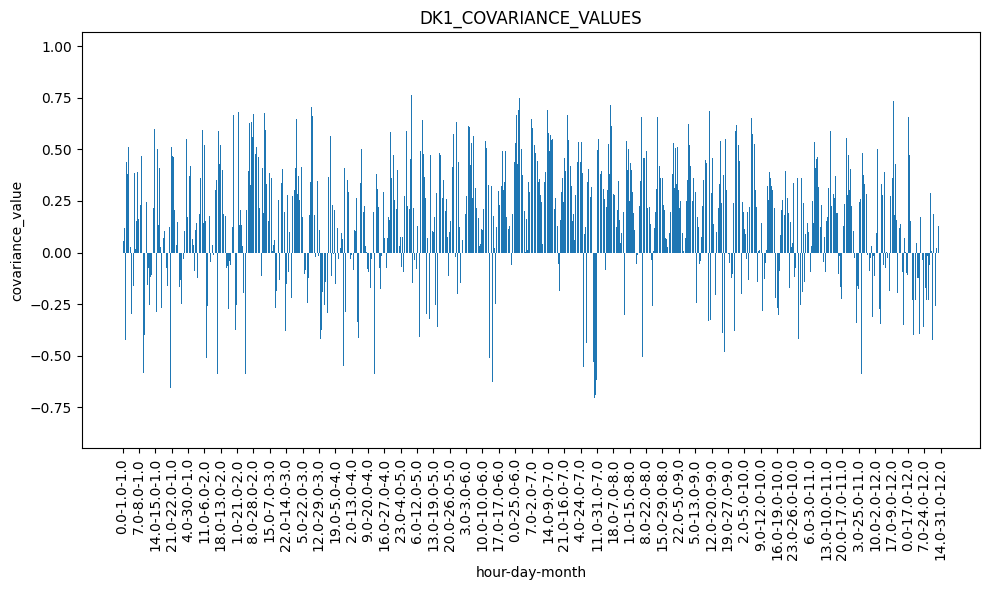

In [6]:
#Plotting the Graphs(Histograms)
%matplotlib inline
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

x = covariance_df['hour'].astype(str) + "-" + covariance_df['date'].astype(str) + "-" + covariance_df['month'].astype(str)
y = covariance_df['covariance_value_with_DK1']

plt.bar(x, y)
plt.xlabel('hour-day-month')
plt.ylabel('covariance_value')
plt.title('DK1_COVARIANCE_VALUES')

# Reduce the number of x-axis ticks by specifying the step size
step_size = int(len(x) * 0.02)  # 10 percent of the total number of ticks
plt.xticks(range(0, len(x), step_size), x[::step_size], rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.show()

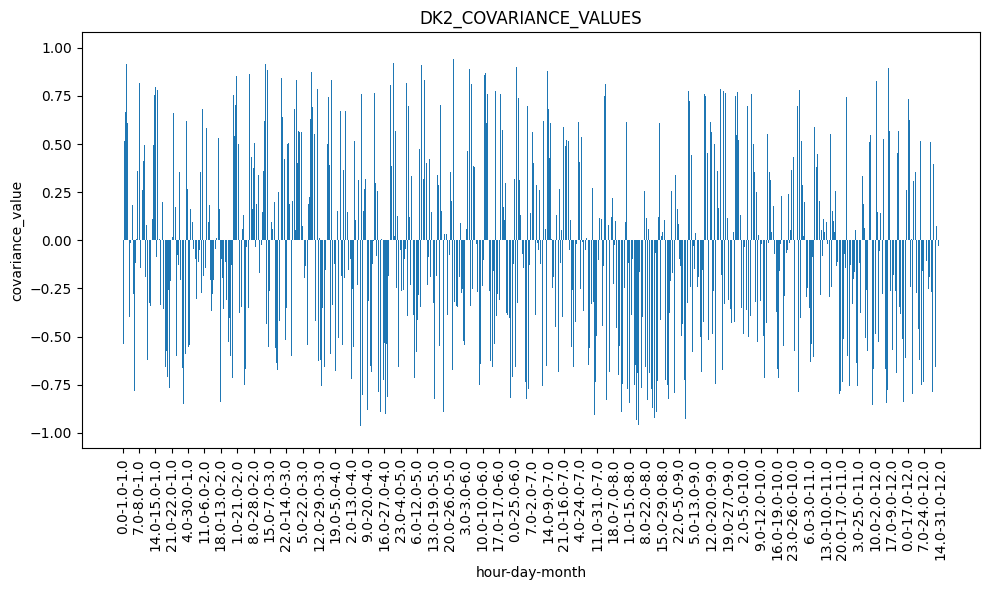

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

x = covariance_df['hour'].astype(str) + "-" + covariance_df['date'].astype(str) + "-" + covariance_df['month'].astype(str)
y = covariance_df['covariance_value_with_DK2']

plt.bar(x, y)
plt.xlabel('hour-day-month')
plt.ylabel('covariance_value')
plt.title('DK2_COVARIANCE_VALUES')

# Reduce the number of x-axis ticks by specifying the step size
step_size = int(len(x) * 0.02)  # 10 percent of the total number of ticks
plt.xticks(range(0, len(x), step_size), x[::step_size], rotation=90)

plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.show()

In [8]:
# Calculating Bins
def process(a):
  if np.isnan(a):
    return 'NaN'
  if (a<=-0.7):
    return 'very strong negative'
  elif (a<=-0.5 and a>=-0.7):
    return 'strong negative'
  elif (a<=-0.3 and a>=-0.5):
    return 'moderate negative'
  elif(a<=0 and a>=-0.3):
    return 'weak negative'
  elif(a<=0.3 and a>=0):
    return 'weak positive'
  elif(a<=0.5 and a>=0.3):
    return 'moderate positive'
  elif(a<=0.7 and a>=0.5):
    return 'strong positive'
  else:
    return 'very strong positive'

In [9]:
covariance_df['strength_with_DK1']='0'
covariance_df['strength_with_DK2']='0'
for i in range (0,8760):
  covariance_df.loc[i,'strength_with_DK1']=process(covariance_df['covariance_value_with_DK1'].iloc[i])
  covariance_df.loc[i,'strength_with_DK2']=process(covariance_df['covariance_value_with_DK2'].iloc[i])

<function matplotlib.pyplot.show(close=None, block=None)>

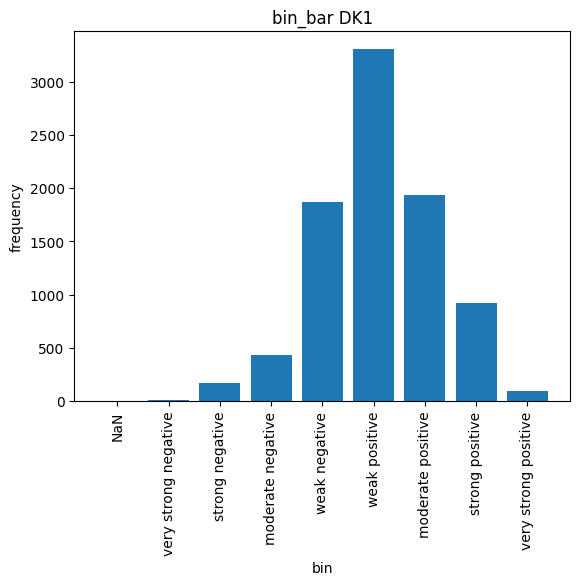

In [10]:
import matplotlib.pyplot as plt
x=['NaN','very strong negative','strong negative','moderate negative','weak negative','weak positive','moderate positive','strong positive','very strong positive']
y=[(covariance_df['strength_with_DK1']=='Nan').sum(),(covariance_df['strength_with_DK1']=='very strong negative').sum(),
 (covariance_df['strength_with_DK1']=='strong negative').sum(),(covariance_df['strength_with_DK1']=='moderate negative').sum(),(covariance_df['strength_with_DK1']=='weak negative').sum(),(covariance_df['strength_with_DK1']=='weak positive').sum(),(covariance_df['strength_with_DK1']=='moderate positive').sum(),(covariance_df['strength_with_DK1']=='strong positive').sum(),(covariance_df['strength_with_DK1']=='very strong positive').sum()]
plt.bar(x,y)
plt.xlabel('bin')
plt.ylabel('frequency')
plt.title('bin_bar DK1')
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

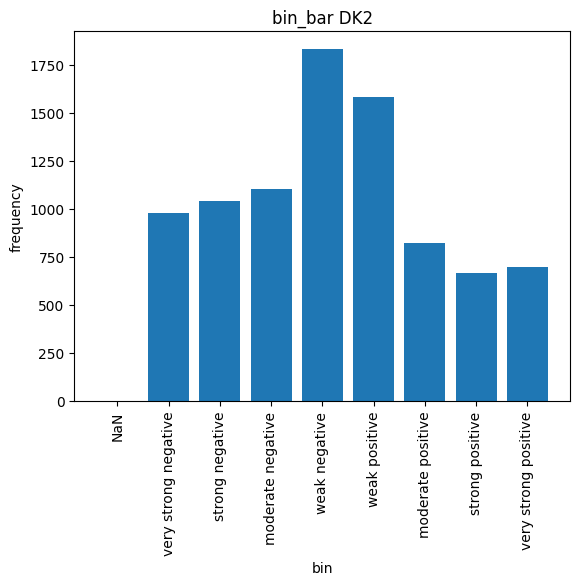

In [11]:
import matplotlib.pyplot as plt
x=['NaN','very strong negative','strong negative','moderate negative','weak negative','weak positive','moderate positive','strong positive','very strong positive']
y=[(covariance_df['strength_with_DK2']=='Nan').sum(),(covariance_df['strength_with_DK2']=='very strong negative').sum(),
 (covariance_df['strength_with_DK2']=='strong negative').sum(),(covariance_df['strength_with_DK2']=='moderate negative').sum(),(covariance_df['strength_with_DK2']=='weak negative').sum(),(covariance_df['strength_with_DK2']=='weak positive').sum(),(covariance_df['strength_with_DK2']=='moderate positive').sum(),(covariance_df['strength_with_DK2']=='strong positive').sum(),(covariance_df['strength_with_DK2']=='very strong positive').sum()]
plt.bar(x,y)
plt.xlabel('bin')
plt.ylabel('frequency')
plt.title('bin_bar DK2')
plt.xticks(rotation=90)
plt.show

In [12]:
#Highest R value Finding throughout the year
top_5_max_values=covariance_df['covariance_value_with_DK1'].nlargest(5)
top_5_Max_indices=top_5_max_values.index
top_5_Max_indices

Index([4254, 4253, 4255, 4238, 4252], dtype='int64')

In [13]:
def make_graph(i):
  x=np.array([mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]])
  y=np.array([producer_mixed_df['2018_values'].iloc[i],producer_mixed_df['2019_values'].iloc[i],producer_mixed_df['2020_values'].iloc[i],producer_mixed_df['2021_values'].iloc[i],producer_mixed_df['2022_values'].iloc[i],producer_mixed_df['2023_values'].iloc[i]])
  plt.scatter(x,y)
  slope,intercept,rvalue,pvalue,stderr=linregress(x,y)
  plt.plot(x,slope*x+intercept)
  plt.title(f"{mixed_df['date'].iloc[i]},{mixed_df['month'].iloc[i]},{mixed_df['hour'].iloc[i]} with {covariance_df['covariance_value_with_DK1'].iloc[i]} covariance value with DK1")
  plt.savefig(f"graph_{i}.png")
  plt.show()

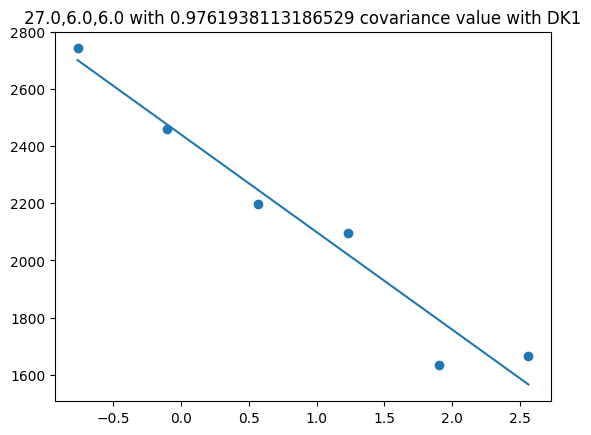

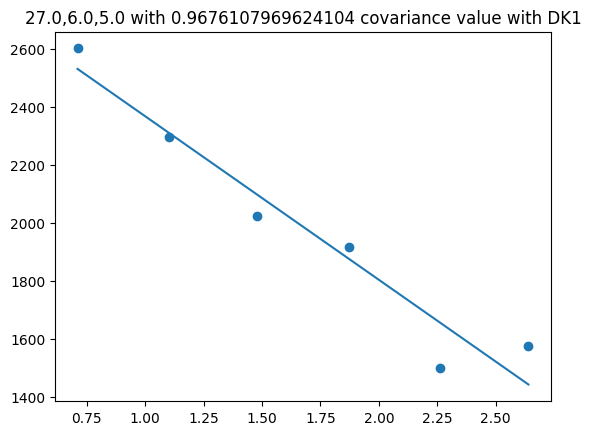

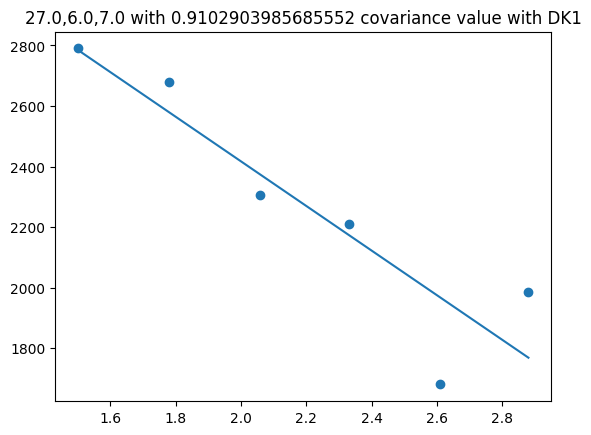

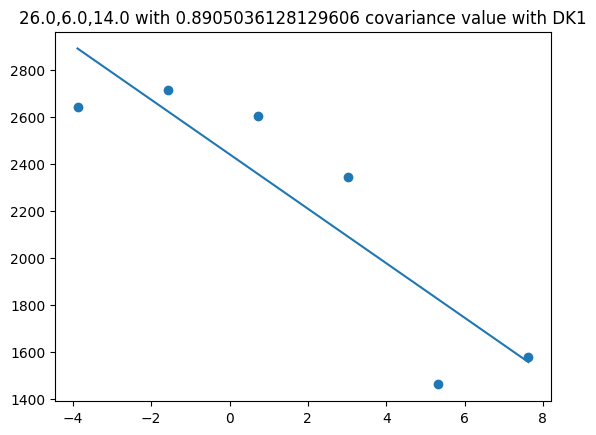

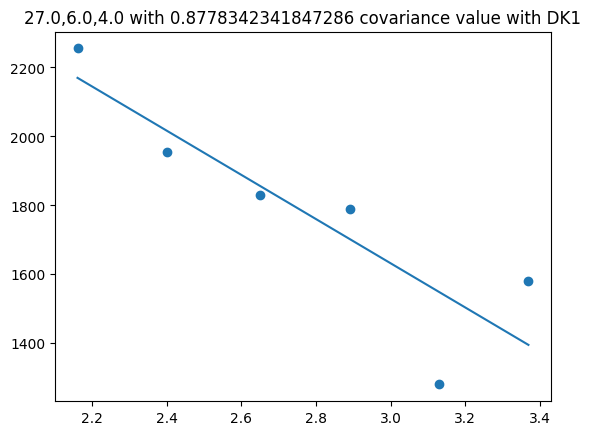

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy.stats import linregress
!pip install scipy
for i in range (0,5):
  make_graph(top_5_Max_indices[i])

In [15]:
top_5_max_values2=covariance_df['covariance_value_with_DK2'].nlargest(5)
top_5_Max_indices2=top_5_max_values2.index
top_5_Max_indices2

Index([3206, 40, 3203, 3205, 3204], dtype='int64')

In [16]:
def make_graph(i):
  x=np.array([mixed_df['values_2018'].iloc[i],mixed_df['values_2019'].iloc[i],mixed_df['values_2020'].iloc[i],mixed_df['values_2021'].iloc[i],mixed_df['values_2022'].iloc[i],mixed_df['values_2023'].iloc[i]])
  y=np.array([producer_mixed_df2['2018_values'].iloc[i],producer_mixed_df2['2019_values'].iloc[i],producer_mixed_df2['2020_values'].iloc[i],producer_mixed_df2['2021_values'].iloc[i],producer_mixed_df2['2022_values'].iloc[i],producer_mixed_df2['2023_values'].iloc[i]])
  plt.scatter(x,y)
  slope,intercept,rvalue,pvalue,stderr=linregress(x,y)
  plt.plot(x,slope*x+intercept)
  plt.title(f"{mixed_df['date'].iloc[i]},{mixed_df['month'].iloc[i]},{mixed_df['hour'].iloc[i]} with {covariance_df['covariance_value_with_DK2'].iloc[i]} covariance value with DK2")
  plt.savefig(f"graph_{i}.png")
  plt.show()

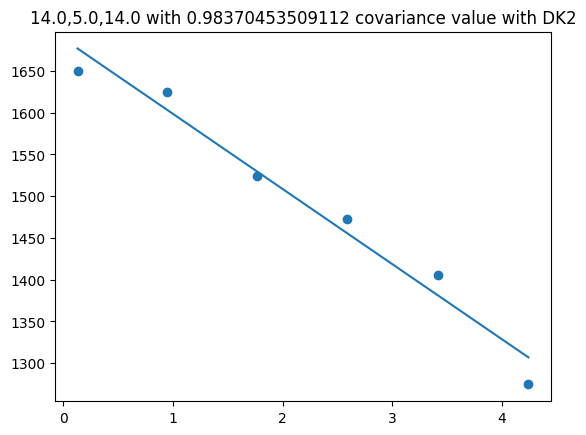

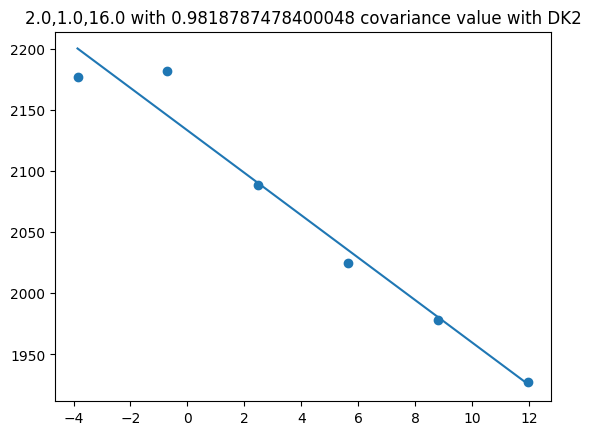

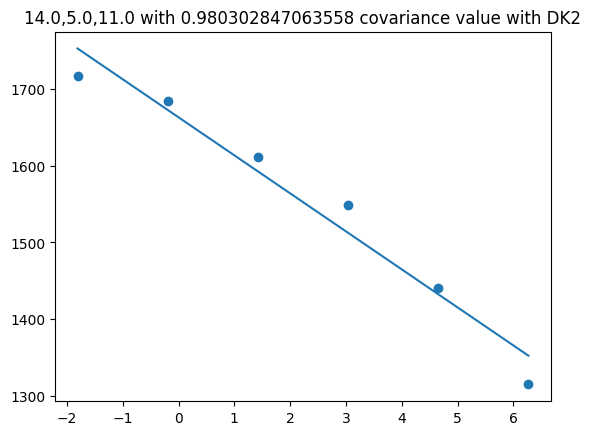

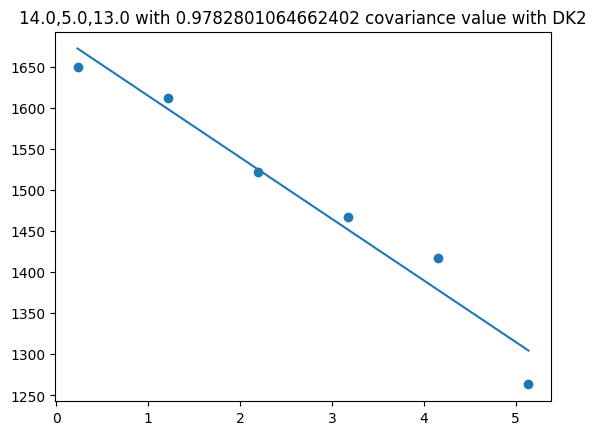

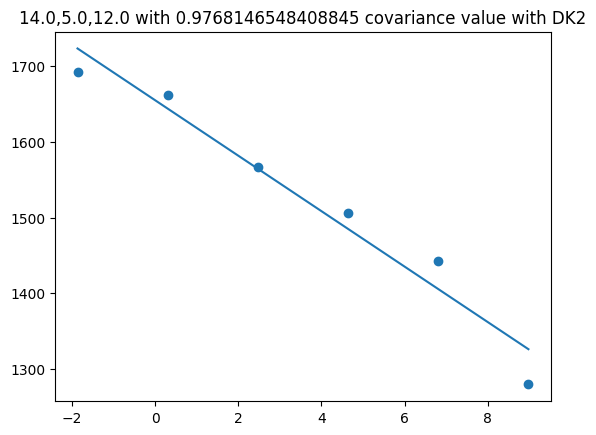

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as stats
from scipy.stats import linregress
!pip install scipy
for i in range (0,5):
  make_graph(top_5_Max_indices2[i])

In [18]:
covariance_df.to_csv('NO_covariance.csv')